**MLP Classifier Model**

Train Accuracy 99%

Test Accuracy 99%

In this problem, I will predict the probability of the person or customer defaulting and then go on to classify them as defaulters or non-defaulters. Clean/ transform the data as necessary, perform EDA to analyze the relationship b/w the Status(Target) and the remaining features(Independant). Use a sequential Neural Network model (Feed Forward) to classify the outcome (Defaulter vs Non Defaulter).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('default.csv')

In [ ]:
data = pd.read_csv('default.csv')

In [ ]:
df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2


In [ ]:
df.isnull().sum()

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    int64  
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


In [ ]:
df['Gender'].value_counts()

Male      548
Female    233
Name: Gender, dtype: int64

In [ ]:
df['Job'].value_counts()

skilled       557
Management    119
unskilled     105
Name: Job, dtype: int64

In [ ]:
df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

In [ ]:
df['CreditHistory'].value_counts()

verygood    265
good        235
critical    184
poor         97
Name: CreditHistory, dtype: int64

In [ ]:
df['Purpose'].value_counts()

consumerdurable    280
car                260
education          125
personal           116
Name: Purpose, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanOffered,781.0,0.756722,0.429336,0.0,1.0,1.0,1.0,1.0
WorkExp,781.0,12.377721,3.809161,0.0,11.0,13.0,15.0,19.0
CreditScore,781.0,83.597951,12.040410,42.0,83.0,87.0,91.0,99.0
EMIRatio,781.0,9.495006,2.786867,3.0,7.4,9.5,11.4,15.0
Ownhouse,781.0,0.768246,0.422223,0.0,1.0,1.0,1.0,1.0
Dependents,781.0,2.081946,1.068641,0.0,2.0,2.0,3.0,4.0


In [ ]:
df[['Gender' , 'Job' , 'Status' , 'CreditHistory']].describe().T

,count,unique,top,freq
Gender,781,2,Male,548
Job,781,3,skilled,557
Status,781,2,No,656
CreditHistory,781,4,verygood,265


In [ ]:
df = pd.get_dummies(df , columns = ['Gender' , 'Purpose' , 'Job'])

In [ ]:
df['Status'] = df.Status.map({'Default' : 1 , 'No' : 0})

In [ ]:
data['Status'] = data.Status.map({'Default' : 1 , 'No' : 0})

In [ ]:
data.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,0,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,0,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,0,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,0,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,0,poor,1,personal,2


In [ ]:
df['CreditHistory'] = df.CreditHistory.map({'verygood' : 4 , 'good' : 3 , 'poor' : 2 , 'critical' : 1})

In [ ]:
df.head()

,LoanOffered,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Dependents,Gender_Female,Gender_Male,Purpose_car,Purpose_consumerdurable,Purpose_education,Purpose_personal,Job_Management,Job_skilled,Job_unskilled
0,0,14,86,3.0,0,2,1,2,0,1,0,0,0,1,0,0,1
1,1,15,94,3.0,0,2,1,3,1,0,0,0,0,1,0,1,0
2,0,16,86,3.0,0,2,1,2,0,1,0,0,0,1,0,0,1
3,1,13,94,3.0,0,2,1,3,1,0,0,0,0,1,0,1,0
4,1,12,85,3.3,0,2,1,2,0,1,0,0,0,1,0,1,0


In [ ]:
data.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,0,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,0,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,0,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,0,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,0,poor,1,personal,2


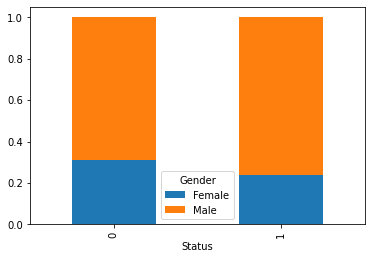

In [ ]:
by_gender=pd.crosstab(data['Status'],data['Gender'])
by_gender.div(by_gender.sum(1).astype(float),axis=0).plot.bar(stacked='True')

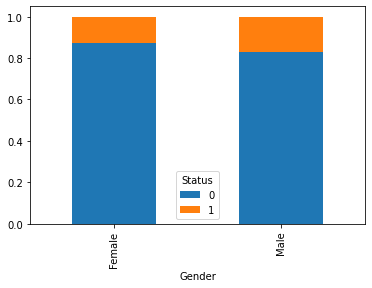

In [ ]:
by_gender=pd.crosstab(data['Gender'],data['Status'])
by_gender.div(by_gender.sum(1).astype(float),axis=0).plot.bar(stacked='True')

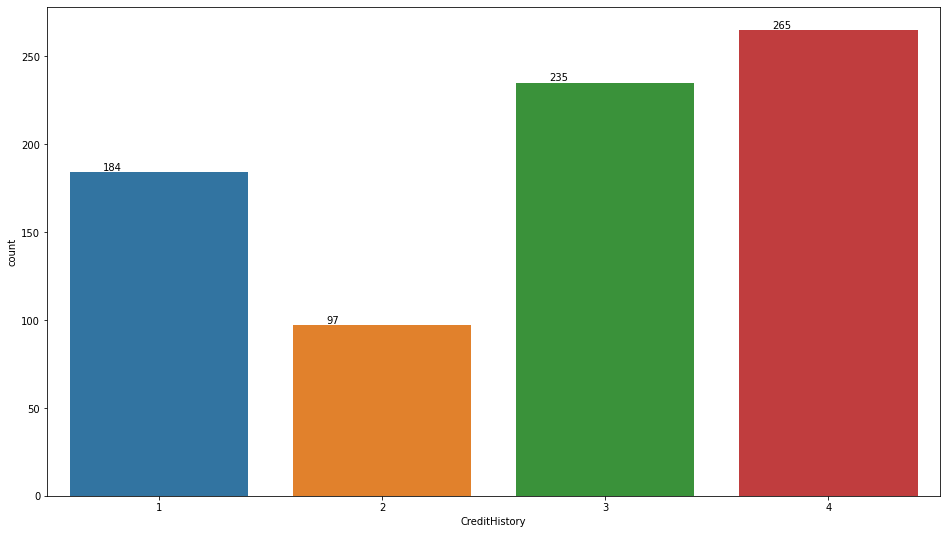

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=df, x = 'CreditHistory')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Text(0.5, 1.0, 'Histogram')

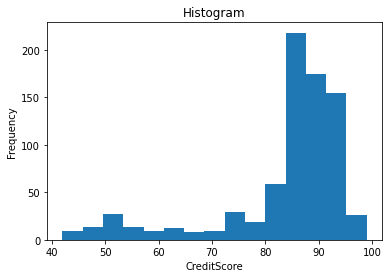

In [ ]:
plt.hist(df.CreditScore, bins = 15)
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('Histogram')

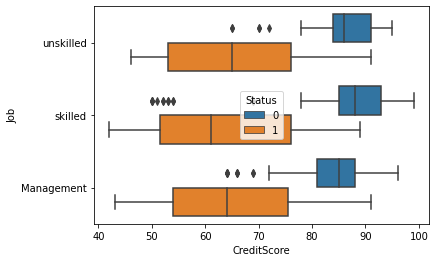

In [ ]:
sns.boxplot(x='CreditScore',y='Job',data=data,hue='Status')

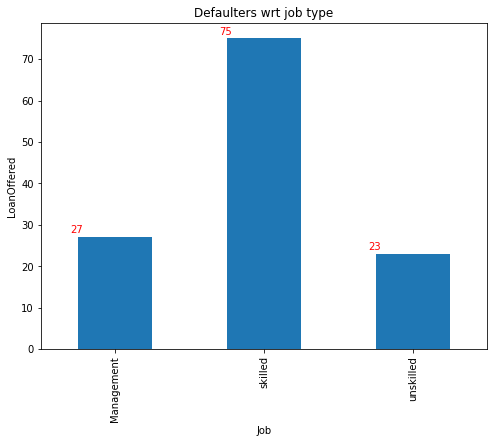

In [ ]:
Occ_abs = data.groupby('Job')[['Status']].sum()
b = Occ_abs.plot(kind = 'bar', figsize = (8,6), legend = False)
for i, v in enumerate(Occ_abs.values):
    b.text(i-0.30,v+1,str(np.int(np.round(v))), color = 'red')
b.set_ylabel('LoanOffered')
b.set_title('Defaulters wrt job type')
plt.show()

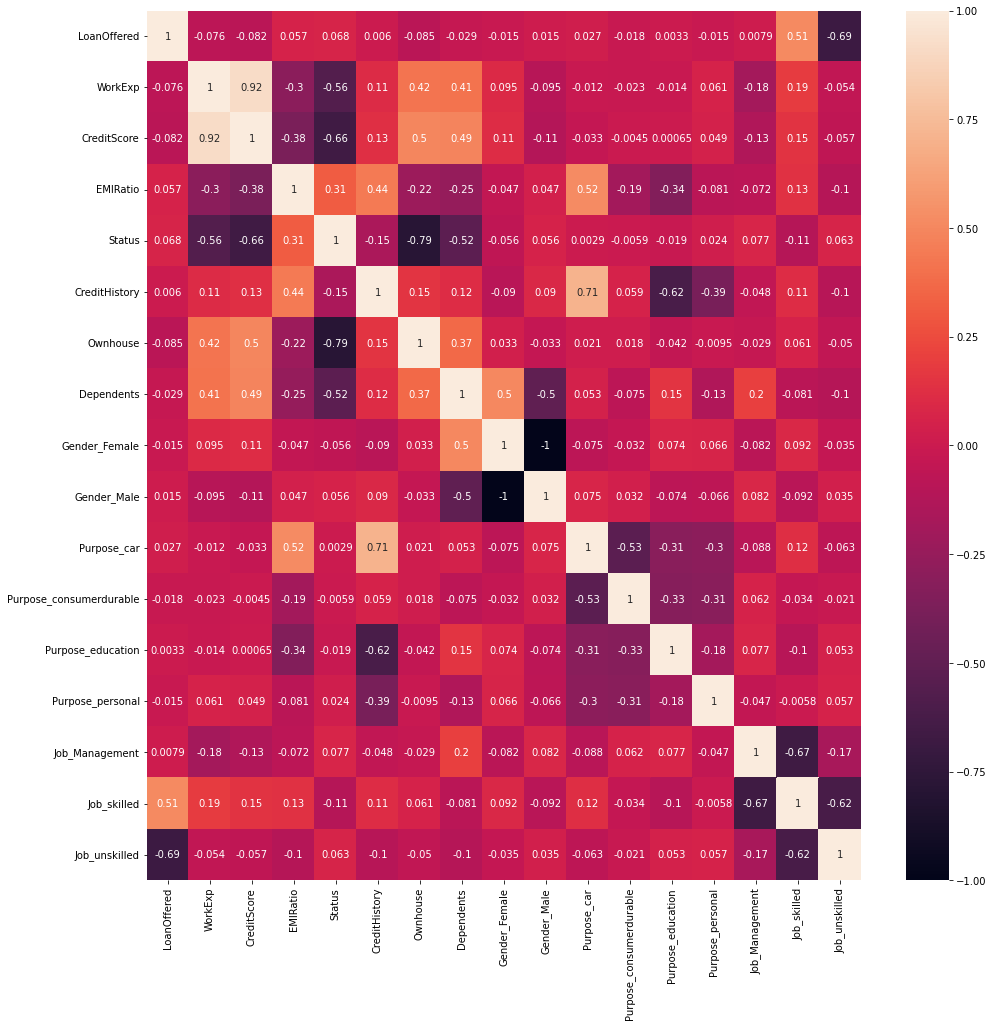

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

## Multi Layer Perceptron (MLP) Model, a feed forward neural network

### Model 1

In [ ]:
X = df.drop("Status" , axis=1)

Y = df.pop("Status")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
#ss.fit_transform(X_train)
#transforming it from array to dataframe

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train) , columns = X_train.columns)

X_test_scaled = pd.DataFrame(ss.transform(X_test) , columns = X_test.columns) 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nncl = MLPClassifier(max_iter=2000)

In [ ]:
nncl.fit(X_train_scaled,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
nncl.score(X_train_scaled,Y_train)

0.9981684981684982

In [ ]:
nncl.score(X_test_scaled,Y_test)

0.9787234042553191

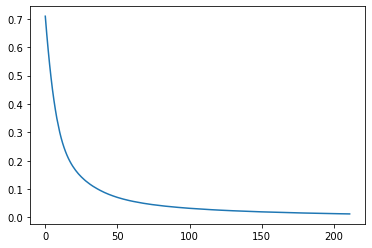

In [ ]:
plt.plot(  nncl.loss_curve_)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_train = nncl.predict(X_train_scaled)
y_pred_test = nncl.predict(X_test_scaled)

print(classification_report(Y_train,y_pred_train))
print(classification_report(Y_test,y_pred_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       459
           1       0.99      1.00      0.99        87

    accuracy                           1.00       546
   macro avg       0.99      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       197
           1       0.95      0.92      0.93        38

    accuracy                           0.98       235
   macro avg       0.97      0.96      0.96       235
weighted avg       0.98      0.98      0.98       235



### Model 2

In [ ]:
nncl = MLPClassifier(hidden_layer_sizes= 100,
                     max_iter = 2000,
                     tol = 0.0001,
                     random_state = 101,
                     activation = 'logistic',
                     solver =  'sgd',
                     learning_rate = 'adaptive')
nncl.fit(X_train_scaled,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
nncl.score(X_train_scaled,Y_train)

0.9542124542124543

In [ ]:
nncl.score(X_test_scaled,Y_test)

0.9574468085106383

In [ ]:
y_pred_train = nncl.predict(X_train_scaled)
y_pred_test = nncl.predict(X_test_scaled)

print(classification_report(Y_train,y_pred_train))
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       459
           1       0.97      0.74      0.84        87

    accuracy                           0.95       546
   macro avg       0.96      0.87      0.90       546
weighted avg       0.95      0.95      0.95       546

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       197
           1       1.00      0.74      0.85        38

    accuracy                           0.96       235
   macro avg       0.98      0.87      0.91       235
weighted avg       0.96      0.96      0.95       235



### Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'hidden_layer_sizes': [10,100,1000],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['adaptive','constant'],
    'tol': [0.01,0.001,0.0001]
}

In [ ]:
nncl = MLPClassifier(random_state=1,max_iter=5000,solver='sgd')

In [ ]:
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3,n_jobs=-1)

In [ ]:
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=5000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...=True, solver='sgd',
                                     tol=0.0001, validation_fraction=0.1,
                                     verbose=False, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
      

In [ ]:
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 100,
 'learning_rate': 'adaptive',
 'tol': 0.0001}

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_train_predict_prob = best_model.predict_proba(X_train_scaled)
y_test_predict_prob = best_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn import metrics

In [ ]:
for j in np.arange(0.45,0.55,0.01):
  custom_prob = j
  custom_cutoff_train = []
  custom_cutoff_test = []
  for i in range(0,len(y_train_predict_prob[:,1])):
    if y_train_predict_prob[:,1][i] > custom_prob:
      a = 1
    else:
      a = 0

    custom_cutoff_train.append(a)
  for i in range(0,len(y_test_predict_prob[:,1])):
    if y_test_predict_prob[:,1][i] > custom_prob:
      a = 1
    else:
      a = 0

    custom_cutoff_test.append(a)

  print(round(j,3) , metrics.recall_score(Y_train,custom_cutoff_train))
  print(classification_report(Y_train,custom_cutoff_train))
  print(classification_report(Y_test,custom_cutoff_test))



0.45 1.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.95      1.00      0.97        87

    accuracy                           0.99       546
   macro avg       0.97      0.99      0.98       546
weighted avg       0.99      0.99      0.99       546

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       0.95      0.97      0.96        38

    accuracy                           0.99       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.99      0.99      0.99       235

0.46 1.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.95      1.00      0.97        87

    accuracy                           0.99       546
   macro avg       0.97      0.99      0.98       546
weighted avg       0.99      0.99      0.99       546

 

#### Best Model : 
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
#### Custom custoff : 0.46 
#### Metrics score: 1.0


Train score

In [ ]:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       459
           1       0.95      1.00      0.97        87

    accuracy                           0.99       546
   macro avg       0.97      0.99      0.98       546
weighted avg       0.99      0.99      0.99       546

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       0.95      0.97      0.96        38

    accuracy                           0.99       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.99      0.99      0.99       235


Test Score

In [ ]:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       0.95      0.97      0.96        38

    accuracy                           0.99       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.99      0.99      0.99       235
